# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
!pip install scikit-learn-extra

In [2]:
# import libraries for data manipulation

import pandas as pd
import numpy as np

# import libraries for data visualization

import matplotlib.pylab as plt
import seaborn as sns

# import z-score scaler, pca, clustering algorithms

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [3]:
# connect to google drive
from google.colab import drive
drive.mount("/content/drive")

# read the dataset saved in google drive
ccc_data = pd.read_excel('/content/drive/MyDrive/Python Course/Credit+Card+Customer+Data.xlsx')

# returns the first 5 rows
ccc_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [4]:
ccc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**:
*   The dataset consists of 660 rows and 7 columns.
*   All columns contain 660 entries, suggesting that there are no null values.
* All variables are stored as integer data types, which makes sense based on the nature of the variables in question.



## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

In [5]:
# creates a copy of the data for processing

df = ccc_data.copy()

In [6]:
# confirms no null values

df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# checks for unique values in each column

df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Observations:**

*   'Sl_No' (serial number) contains 660 unique entries, which is to be expected.
*   'Customer Key' contains only 655 unique entries, indicating that there are 5 duplicates to be removed.



In [8]:
# drops rows with duplicate 'Customer Key' from df

df = df.drop(df[df.duplicated(subset=['Customer Key'])].index)
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [9]:
# confirms that duplicates have been dropped

df.nunique()

Sl_No                  655
Customer Key           655
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Observations:**

*   Now that duplicated customers have been removed from the dataset, the columns 'Sl_No' and 'Customer Key' are no longer relevant to our analysis. These columns can be dropped at this stage.



In [10]:
# drops two columns from df

df = df.drop(['Sl_No','Customer Key'], axis = 1)

df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [11]:
# checks for duplicate rows in reduced dataset

df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


**Observations:**

*   After the identifier columns are removed, there are 11 duplicate rows in the dataset.
*   These rows can be dropped from our analysis, as the combination of features they represent are already captured elsewhere in the dataset.



In [12]:
# removes duplicate rows

df = df[~df.duplicated()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     644 non-null    int64
 1   Total_Credit_Cards   644 non-null    int64
 2   Total_visits_bank    644 non-null    int64
 3   Total_visits_online  644 non-null    int64
 4   Total_calls_made     644 non-null    int64
dtypes: int64(5)
memory usage: 30.2 KB


#### **Check the summary Statistics**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

* 'Avg_Credit_Limit' ranges from 3,000 to 200,000 with a mean of 34,543.48 and a median of 18,000. The mean is significantly higher than the median, indicating a skewed distribution.
* 'Total_Credit_Cards' ranges from 1 to 10, with a mean of 4.7.
* 'Total_visits_bank' ranges from 0 to 5, with a mean of 2.3.
* 'Total_visits_online' ranges from 0 to 15, with a mean of 2.6. While the max number of visits is much higher than the max number of bank visits, the mean is only slightly higher, which could indicate the presence of an outlier.
* 'Total_calls_made' ranges from 0 to 10 with a mean of 3.6. This could indicate that more customers prefer the call center, as opposed to in-person or online visits, when seeking out customer service.

Avg_Credit_Limit
Skew : 2.19


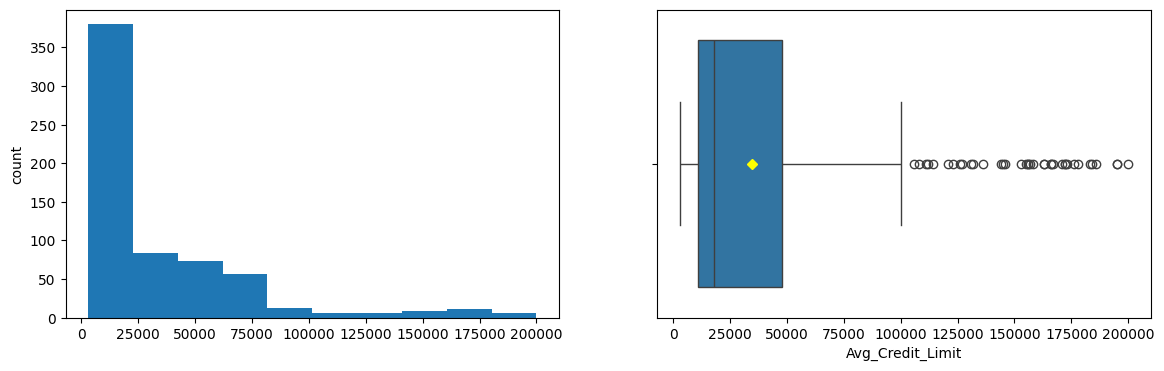

Total_Credit_Cards
Skew : 0.17


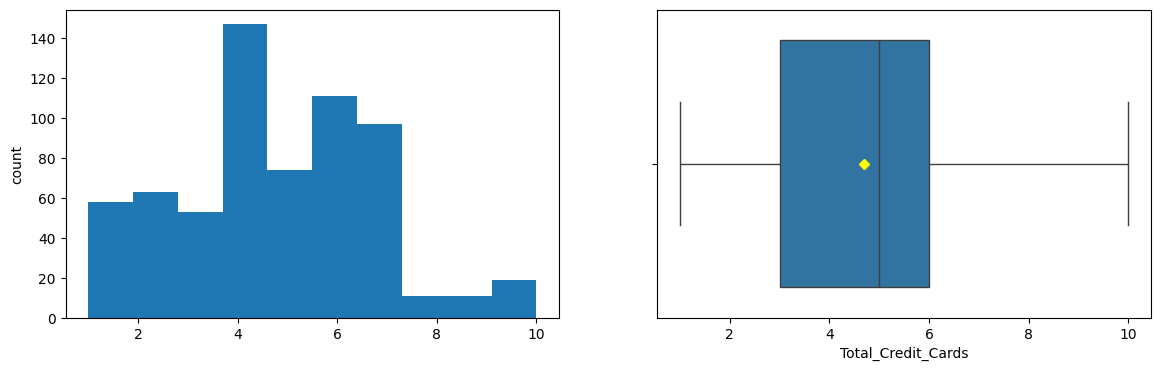

Total_visits_bank
Skew : 0.15


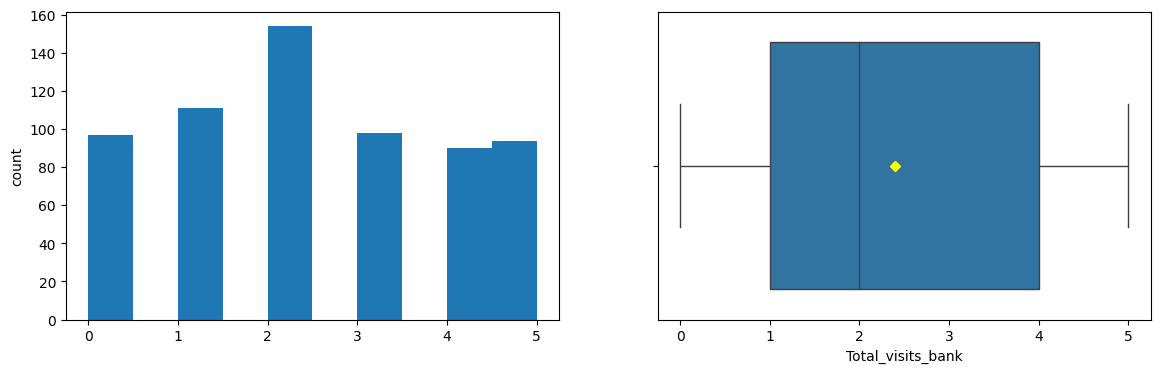

Total_visits_online
Skew : 2.21


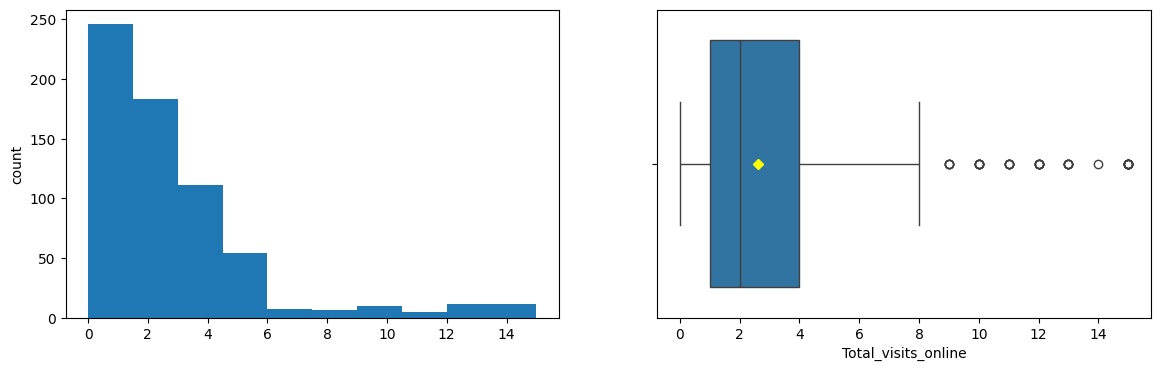

Total_calls_made
Skew : 0.65


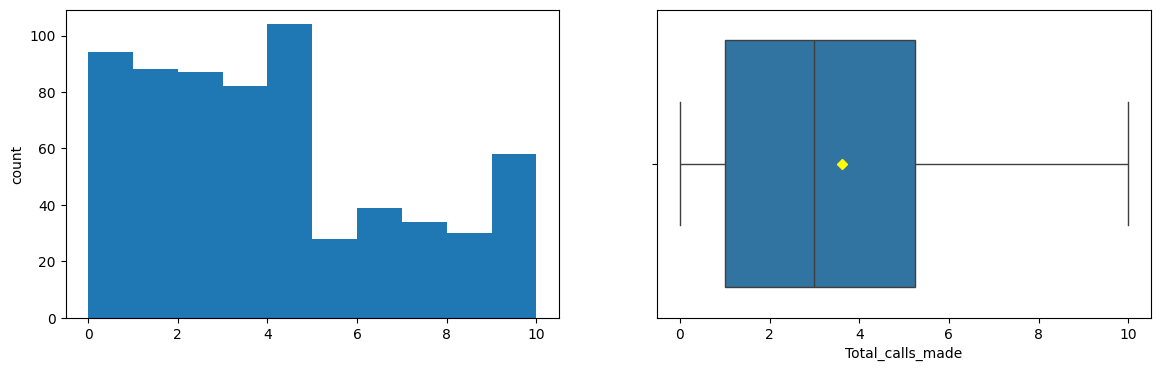

In [14]:
# shows the distribution of each numeric variable

for col in df.columns:

    print(col)

    print('Skew :',round(df[col].skew(),2))

    plt.figure(figsize = (14, 4))

    plt.subplot(1, 2, 1)

    df[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x=df[col],showmeans=True,meanprops={"marker": "D",
                       "markerfacecolor": "yellow",
                       "markeredgecolor": "yellow",
                       "markersize": "5"})

    plt.show()

**Observations:**

*   'Avg_Credit_Limit' is heavily right-skewed, with numerous outliers on the right side of the box plot. This indicates that while a large percentage of customers receive a credit limit below 20,000, the bank also serves many higher-income customers with credit limits above 100,000.
*   'Total_Credit_Cards' is slightly left-skewed with no outliers.
* 'Total_visits_bank' is slightly right-skewed with no outliers.
* 'Total_visits_online' is heavily right-skewed, with multiple outliers on the right side. This indicates that while many customers choose not to use the online channel at all, some of those who do use it end up making frequent visits.
* 'Total_calls_made' is right-skewed with no outliers.



In [15]:
# counts rows where credit limit is above 100000

df_outliers = df[df['Avg_Credit_Limit'] > 100000]
df_outliers.shape[0]

38

In [16]:
# calculates % of rows where credit limit is above 100000

round(df_outliers.shape[0] / df.shape[0],2)

0.06

**Observations:**

*   There are 38 rows where 'Avg_Credit_Limit' is greater than 100,000, placing them beyond the upper range of the boxplot.
*   This translates to 6% of the total observations.







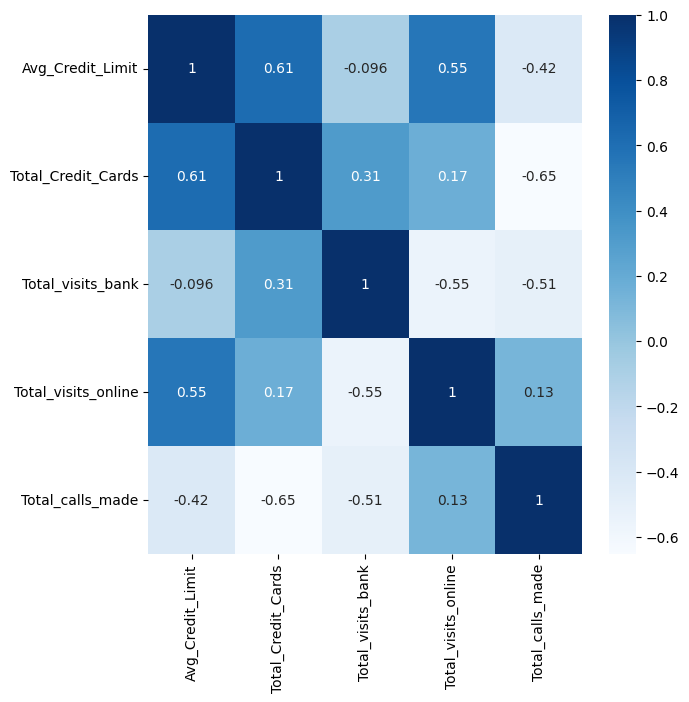

In [17]:
# creates a heatmap of correlations between variables

plt.figure(figsize = (7, 7))

sns.heatmap(df.corr(),annot = True,cmap='Blues')

plt.show()

**Observations:**

*   'Avg_Credit_Limit' is positively correlated with 'Total_Credit_Cards,' which makes sense as customers with more credit cards will have a higher overall credit limit.
*   'Avg_Credit_Limit' is also positively correlated with 'Total_visits_online,' which could indicate that these are more active bank customers who prefer to manage their accounts online.
* 'Total_Credit_Cards' is negatively correlated with 'Total_calls_made,' which appears to indicate that customers with more credit cards prefer in-person or online visits rather than going through the call center.
* 'Total_visits_bank' is negatively correlated with both 'Total_visits_online' and 'Total_calls_made,' which could indicate that some customers prefer to manage their accounts in person rather than online or over the phone.



#### **Scaling the data**

In [18]:
# transforms data using StandardScaler
# creates df_scaled with scaled data

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


#### **Applying PCA on scaled data**

In [19]:
# initializes pca function with 5 components

pca = PCA(n_components=df_scaled.shape[1],random_state=1)

# applies pca on scaled data

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# calculates percentage of variance explained by each principal component

exp_var = (pca.explained_variance_ratio_)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

In [20]:
# creates empty dictionary to store the SSE for each value of K

sse = {}

# iterates for a range of Ks and fits the pca data to the algorithm

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k,random_state = 1).fit(data_pca)

    sse[k] = kmeans.inertia_ # stores the inertia value for K

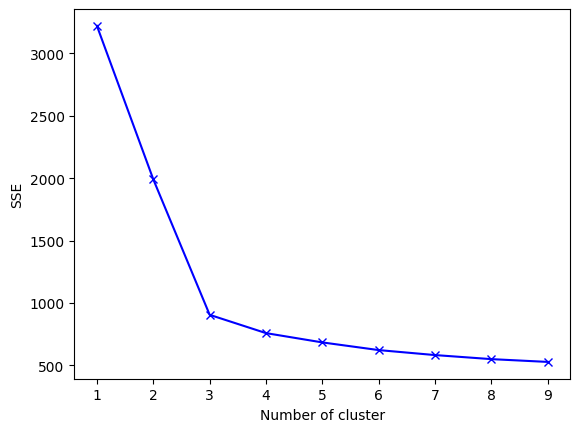

In [21]:
# creates elbow plot

plt.figure()

plt.plot(list(sse.keys()),list(sse.values()),'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:**

*   In the above elbow plot, the rate of decrease in SSE starts to slow down significantly at point 3, which would indicate that 3 is the optimal number of clusters.
*   We will move forward with K = 3.




Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K:

In [22]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=1)

In [23]:
# creates a copy of the original and pca data
df1 = df.copy()
data_pca1 = data_pca.copy()

# adds k-means cluster labels to the pca and original data
data_pca1['KM_Labels'] = kmeans.labels_
df1['KM_Labels'] = kmeans.labels_


#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [24]:
# count of observations in each cluster

df1['KM_Labels'].value_counts()

1    374
0    221
2     49
Name: KM_Labels, dtype: int64

**Observations:**

*   Cluster 1 contains the largest number of observations with 374.
*   Cluster 2 is the smallest with only 49 observations.

In [25]:
# calculates the mean and median of the original data for each label

mean = df1.groupby('KM_Labels').mean()

median = df1.groupby('KM_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean','group_1 Mean','group_2 Mean',
                    'group_0 Median','group_1 Median','group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


**Observations:**

*   Group 0 contains customers with a lower average credit limit and fewer total credit cards. Group 2 customers have a higher average credit limit and more credit cards. Group 1 (the largest group) falls in between the other groups.
*   Group 1 customers tend to make more bank visits than the other groups.
* Group 2 customers tend to make significantly more online visits than the other groups, and appear to have a strong preference for this channel over the others.
* Group 0 customers tend to use the call center more than the other groups, and appear to prefer this channel over the others.



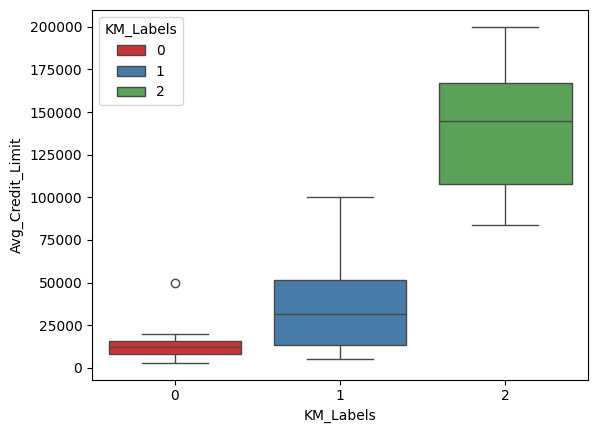

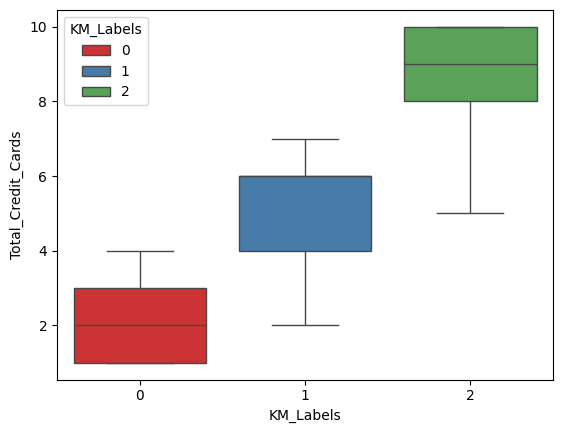

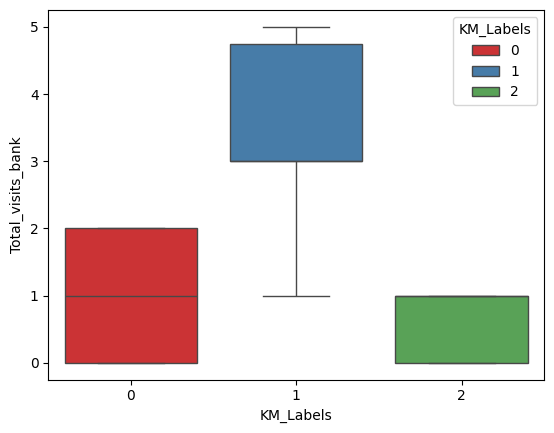

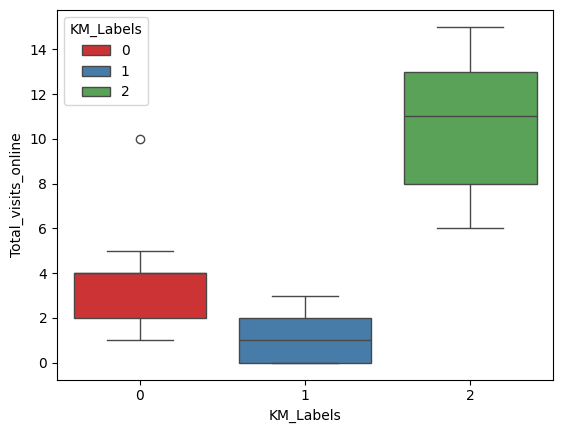

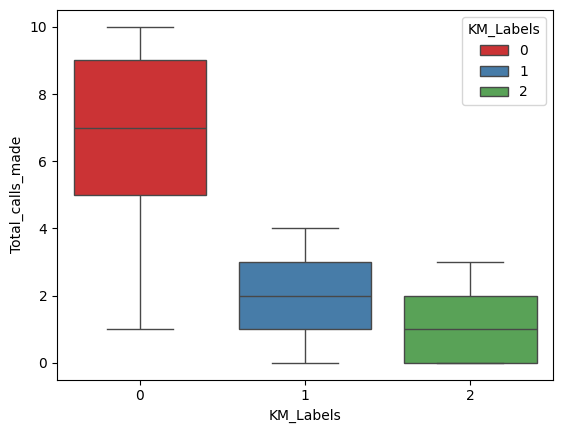

In [26]:
for col in df.columns:
    sns.boxplot(x='KM_Labels',y=col,data=df1,hue='KM_Labels',palette='Set1')
    plt.show()

**Cluster Profiles:**

*   **Cluster 0:**
> * Customers with lower credit limits and 1-4 credit cards.
> * Low preference for bank visits.
> * Low preference for online visits.
> * High preference for call center.
*   **Cluster 1:**
> * Customers with average credit limits and 2-7 credit cards.
> * High preference for bank visits.
> * Low preference for online visits.
> * Low preference for call center.
*   **Cluster 2:**
> * Customers with high credit limits and 5-10 credit cards.
> * Low preference for bank visits.
> * High preference for online visits.
> * Low preference for call center.



## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [27]:
# initializes GaussianMixture with 3 components

gmm = GaussianMixture(n_components=3,random_state=1)

# fits gmm on pca data

gmm.fit(data_pca)

# adds labels to pca and original data

data_pca1['GMM_Labels'] = gmm.predict(data_pca)

df1['GMM_Labels'] = gmm.predict(data_pca)

df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_Labels,GMM_Labels
0,100000,2,1,1,0,1,1
1,50000,3,0,10,9,0,0
2,50000,7,1,3,4,1,1
3,30000,5,1,1,4,1,1
4,100000,6,0,12,3,2,2


#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [28]:
# count of observations in each cluster

df1['GMM_Labels'].value_counts()

1    374
0    221
2     49
Name: GMM_Labels, dtype: int64

**Observations:**

The groupings appear to be the same as the K-Means clusters we observed previously.

In [29]:
# calculates the mean and median of the original data for each label

mean = df1.groupby('GMM_Labels').mean()

median = df1.groupby('GMM_Labels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean','group_1 Mean','group_2 Mean',
                    'group_0 Median','group_1 Median','group_2 Median']

df_gmm.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0
KM_Labels,0.000000,1.000000,2.000000,0.0,1.0,2.0


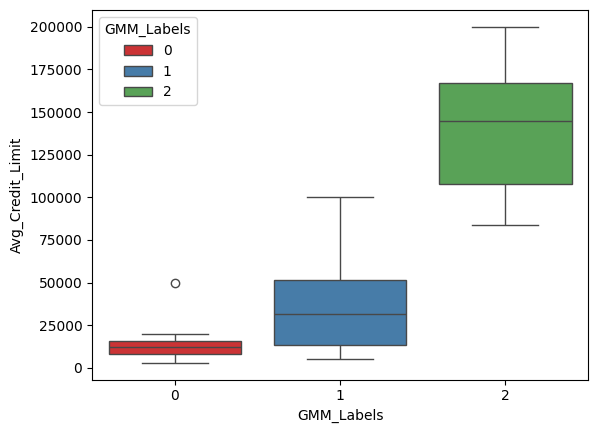

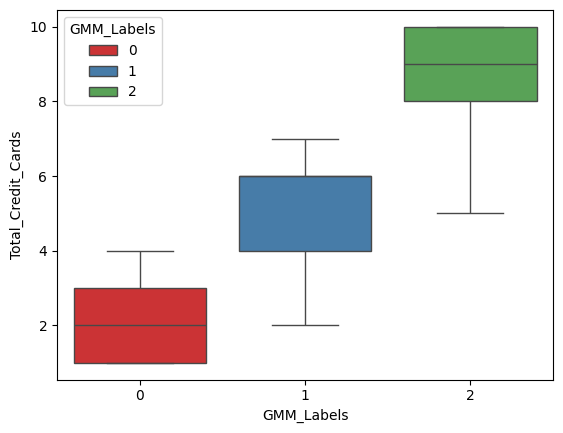

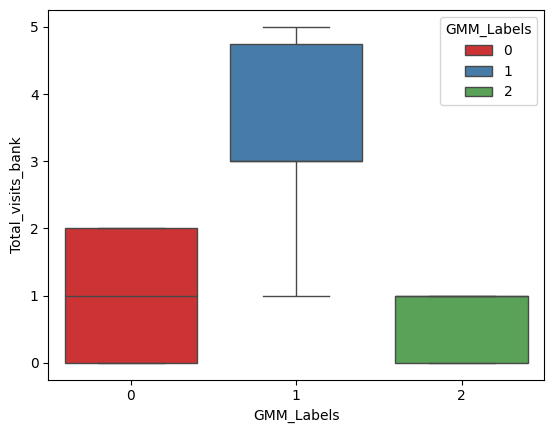

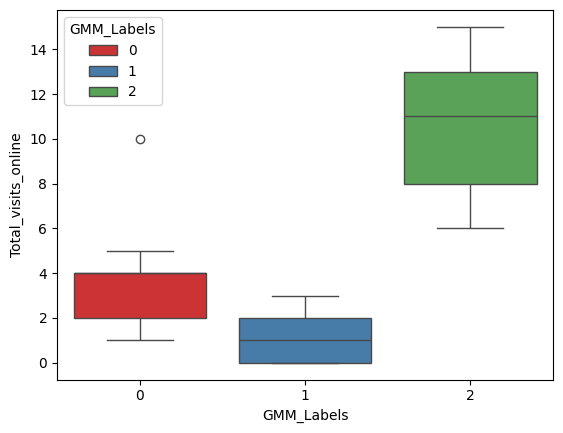

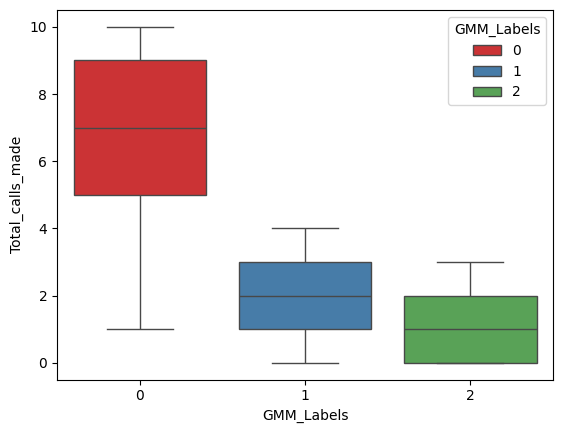

In [30]:
for col in df.columns:
    sns.boxplot(x='GMM_Labels',y=col,data=df1,hue='GMM_Labels',palette='Set1')
    plt.show()

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

**Comparing Clusters:**



In [31]:
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


In [32]:
df_gmm.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0
KM_Labels,0.000000,1.000000,2.000000,0.0,1.0,2.0


In this case, the K-Means and GMM algorithms appear to have produced identical results, with the 644 observations grouped into the same 3 clusters. This consistency strengthens the confidence in the identified clusters and suggests that they are robust and reliable.

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [33]:
# initializes KMedoids with 3 clusters

kmedo = KMedoids(n_clusters=3,random_state=1)

# fits kmedo on pca components

kmedo.fit(data_pca)

# adds labels to pca and original data

data_pca1['KMedo_Labels']=kmedo.predict(data_pca)

df1['KMedo_Labels'] = kmedo.predict(data_pca)

df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_Labels,GMM_Labels,KMedo_Labels
0,100000,2,1,1,0,1,1,1
1,50000,3,0,10,9,0,0,0
2,50000,7,1,3,4,1,1,1
3,30000,5,1,1,4,1,1,1
4,100000,6,0,12,3,2,2,1


#### **Create cluster profiles using the summary statistics and box plots for each label**

In [34]:
# count of observations in each cluster

df1['KMedo_Labels'].value_counts()

2    289
0    222
1    133
Name: KMedo_Labels, dtype: int64

**Observations:**
*   In the K-Medoid groupings, observations are more evenly distributed between clusters compared to K-Means, where the smallest group only had 49 observations.
*   Group 2 is the largest with 289 observations. Group 1 is the smallest with 133.



In [35]:
# calculates the mean and median of the original data for each label

mean = df1.groupby('KMedo_Labels').mean()

median = df1.groupby('KMedo_Labels').median()

df_kmedo = pd.concat([mean, median], axis = 0)

df_kmedo.index = ['group_0 Mean','group_1 Mean','group_2 Mean',
                    'group_0 Median','group_1 Median','group_2 Median']

df_kmedo.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0
KM_Labels,0.004505,1.368421,1.000000,0.0,1.0,1.0
GMM_Labels,0.004505,1.368421,1.000000,0.0,1.0,1.0


**Observations:**

* Group 0 appears to have a lower average credit limit and fewer total credit cards (similar to Group 0 in K-Means/GMM), while Group 1 has a higher average credit limit and more total credit cards (similar to Group 2 in K-Means/GMM), while Group 2 falls in between. However, the Group 1 mean is much higher than the Group 1 median, indicating a skewed distribution and/or the presence of outliers. This makes sense as the 100,000+ credit limit customers we observed earlier are likely included in this group by K-Medoids, rather than grouped separately as they were by K-Means/GMM.
* Group 0 appears to have a higher preference for the call center, followed by a moderate preference for online visits and low preference for bank visits.
* Group 1 appears to have a higher preference for the online channel, based on the mean of 4.6, but this is likely affected by outliers as the medians indicate that all channels are used equally.
* Group 2 appears to have a moderate preference for bank visits, and low preference for the call center and online visits.

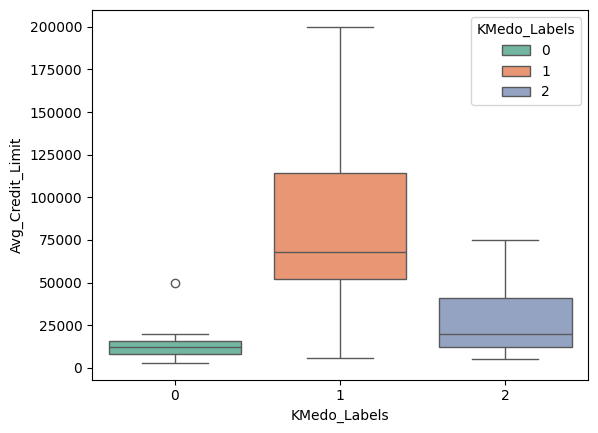

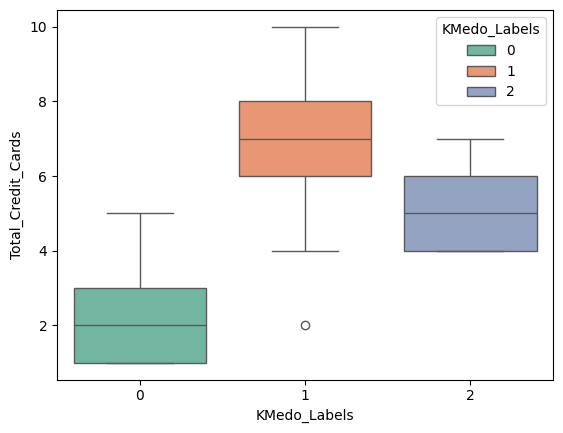

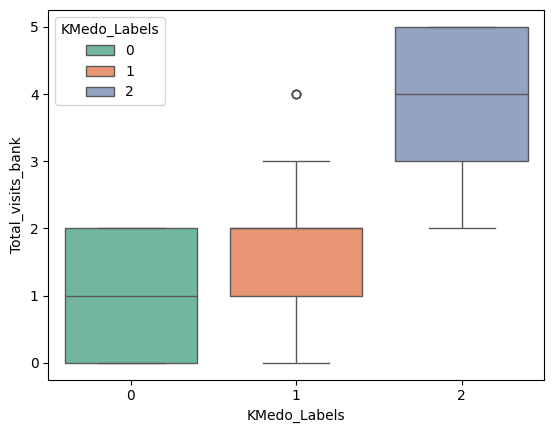

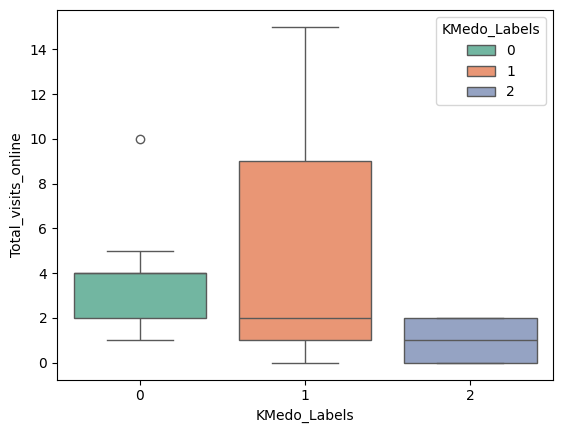

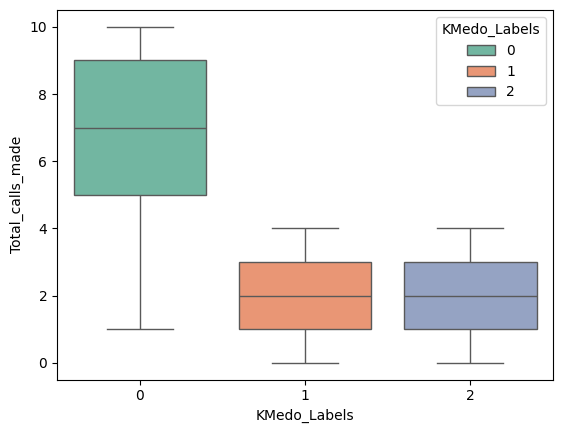

In [36]:
for col in df.columns:
    sns.boxplot(x='KMedo_Labels',y=col,data=df1,hue='KMedo_Labels',palette='Set2')
    plt.show()

**Cluster Profiles:**

*   **Group 0:**
>* Lowest average income and fewest total credit cards.
>* Low preference for bank visits.
>* Low-to-moderate preference for online visits.
>* Highest preference for call center.
*   **Group 1:**
>* Highest average income and most total credit cards, on average.
>* Low preference for bank visits.
>* Low-to-moderate preference for online visits, although some customers in this group use the online channel much more frequently than others.
>* Low preference for call center.
*   **Group 2:**
>* Average income and number of total credit cards fall between Groups 0 and 2.
>* Highest preference for bank visits.
>* Low preference for online visits.
>* Low preference for call center.



#### **Compare the clusters from K-Means and K-Medoids**

Both K-Means and K-Medoids created 3 clusters with varying average credit limit and total credit cards, but these clusters were labeled differently by each model. For comparison purposes, we can simplify this by re-labeling the clusters to be more consistent:
*   Group A: lowest Average_Credit_Limit and lowest Total_Credit_Cards (Group 0 in both K-Means and K-Medoids)
*   Group B: medium Average_Credit_Limit and medium Total_Credit_Cards (Group 1 in both K-Means, Group 2 in K-Medoids)
*   Group C: highest Average_Credit_Limit and highest Total_Credit_Cards (Group 2 in both K-Means, Group 1 K-Medoids)



In [37]:
# create functions to re-label df according to the definition above

def label_KM(x):
  if x==0:
    return 'A'
  if x==1:
    return 'B'
  else:
    return 'C'

def label_KMedo(x):
  if x==0:
    return 'A'
  if x==1:
    return 'C'
  else:
    return 'B'

# apply functions to df1

df1['KM_Labels2'] = df1.KM_Labels.apply(label_KM)
df1['KMedo_Labels2'] = df1.KMedo_Labels.apply(label_KMedo)

df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_Labels,GMM_Labels,KMedo_Labels,KM_Labels2,KMedo_Labels2
0,100000,2,1,1,0,1,1,1,B,C
1,50000,3,0,10,9,0,0,0,A,A
2,50000,7,1,3,4,1,1,1,B,C
3,30000,5,1,1,4,1,1,1,B,C
4,100000,6,0,12,3,2,2,1,C,C


**Size of Clusters**

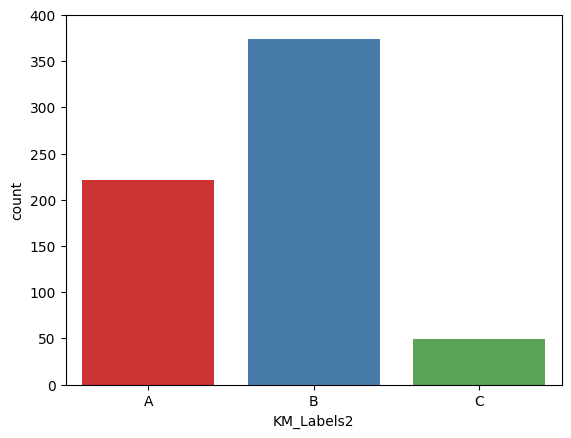

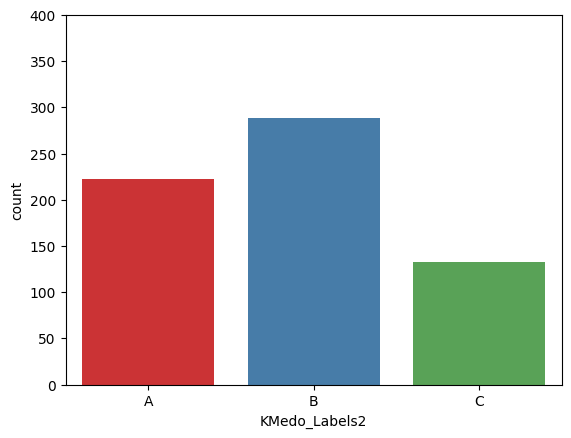

In [38]:
labels = ['KM_Labels2','KMedo_Labels2']

for label in labels:
  sns.countplot(x=label,data=df1,hue=label,order=['A','B','C'],palette='Set1',hue_order=['A','B','C'])
  plt.axis(ymax=400)
  plt.show()


**Observations:**
*   With both K-Means and K-Medoids, Group A (lowest average credit limit and number of credit cards) includes a similar volume of observations and most likely accounts for a similar subset of customers.
*   With K-Means, Group B includes 374 observations, while Group C only includes 49. With K-Medoids, these volumes are closer together (289 in Group B and 133 in Group C).




**Credit Limit**

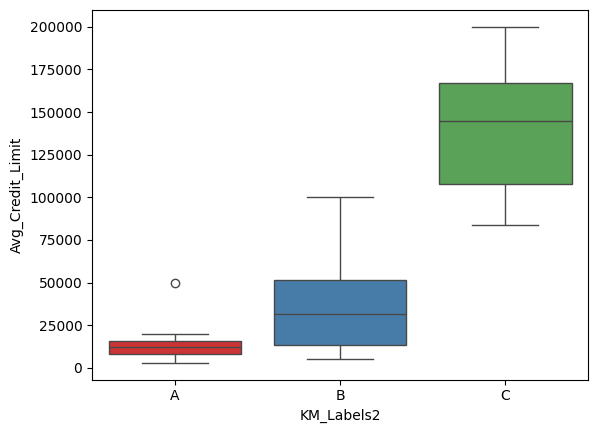

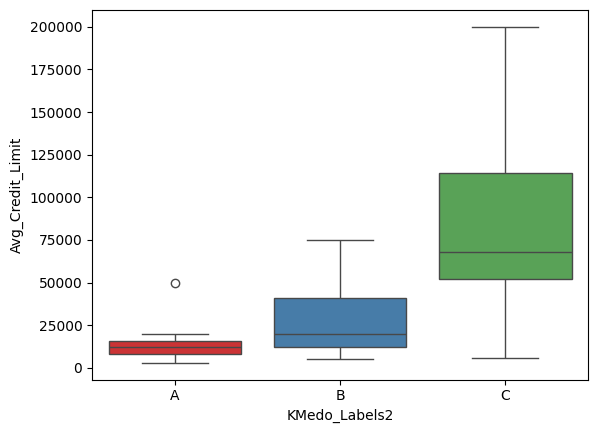

In [40]:
# comparison of k-means and k-medoids: Avg_Credit_Limit

for label in labels:
    sns.boxplot(x=label,y=df1.Avg_Credit_Limit,data=df1,hue=label,order=['A','B','C'],
                palette='Set1',hue_order=['A','B','C'])
    plt.show()

**Observations:**
*   As suggested previously, Group A appears to have a very similar distribution within both K-Means and K-Medoids, indicating that both versions of Group A are made up of a similar subset of customers.
*   In this view, we can see that the K-Means method created a much clearer distinction between Groups B and C, compared to K-Medoids.
* A general advantage of K-Medoids compared to K-Means is that it is less sensitive to outliers. However, in this case, we observed the distribution of 'Avg_Credit_Limit' to be heavily skewed, with 38 outliers falling outside the upper range of the box plot. For customer segmentation and marketing purposes, it may be more useful to place these outliers in a separate smaller group, as in the K-Means clustering, rather than grouping them together with other customers who may display different habits and behaviors.



**Bank Visits**

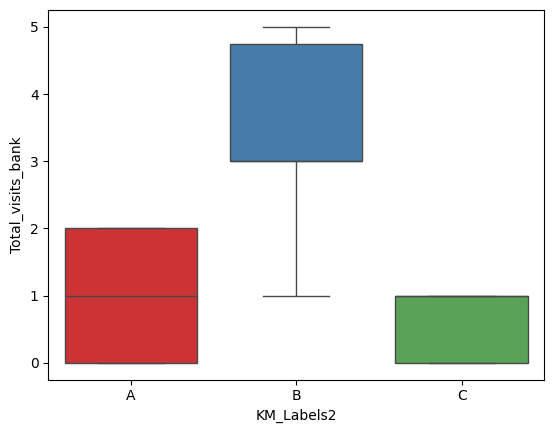

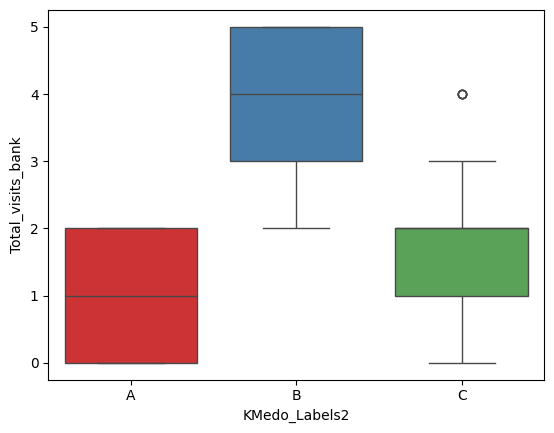

In [41]:
# comparison of k-means and k-medoids: Total_visits_bank

for label in labels:
    sns.boxplot(x=label,y=df1.Total_visits_bank,data=df1,hue=label,order=['A','B','C'],
                palette='Set1',hue_order=['A','B','C'])
    plt.show()

**Observations:**
*   Both views suggest that Groups A and C are less likely to make bank visits than Group B, and Group A customers made 0-2 visits.
* The K-Means view also suggests that higher credit limit customers visited the bank even less frequently than Group A customers (0-1 times), while K-Medoids covers a wider range (0-3 times). For the purposes of this analysis, the K-Means method appears to be more effective in providing specific evidence as to the bank visitation habits of high credit limit customers.



**Call Center**

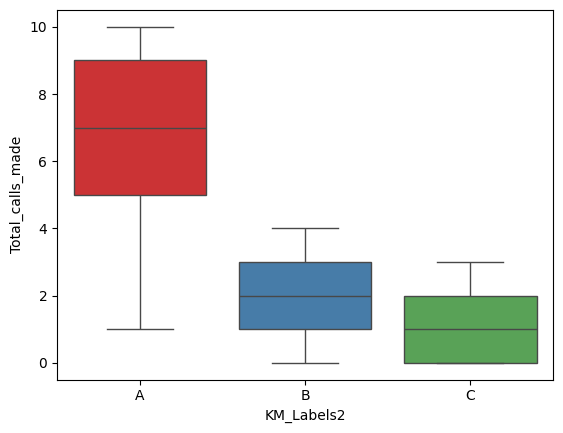

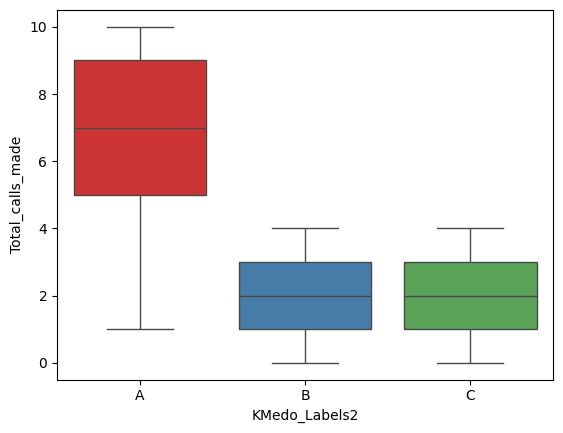

In [42]:
# comparison of k-means and k-medoids: Total_calls_made

for label in labels:
    sns.boxplot(x=label,y=df1.Total_calls_made,data=df1,hue=label,order=['A','B','C'],
                palette='Set1',hue_order=['A','B','C'])
    plt.show()

**Observations:**
*   Both views indicate that Group A customers are much more likely to use the call center compared to Groups B and C.
*   Again, K-Means creates a stronger distinction between Groups B and C; however, in this case, the difference is less pronounced.



**Online Visits**

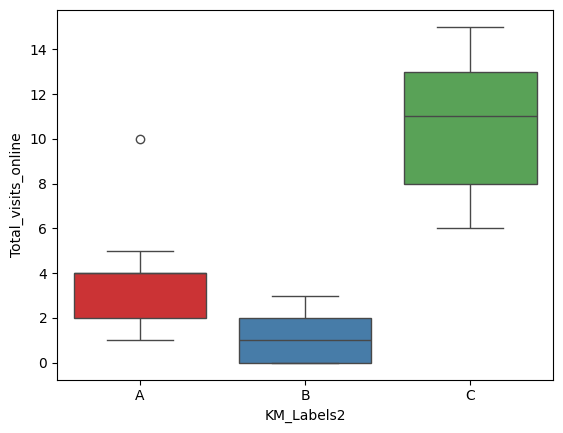

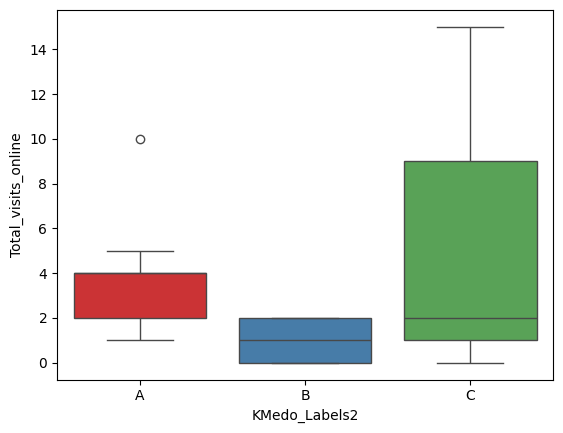

In [43]:
# comparison of k-means and k-medoids: Total_visits_online

for label in labels:
    sns.boxplot(x=label,y=df1.Total_visits_online,data=df1,hue=label,order=['A','B','C'],
                palette='Set1',hue_order=['A','B','C'])
    plt.show()

**Observations:**

* This view provides the clearest evidence in favor of the K-Means approach to this analysis.
* Both views indicate that Group B displayed the least online activity, while Group A was slightly more active.
* In both views, Group C captures the higher end of the range - customers who made 6 or more online visits. However, the K-Means captured only customers with 6 or more online visits, while the K-Medoids' Group C ranges from 0 to 15.
* The K-Means view indicates that customers with a higher average credit limit are much more likely to visit the website for support, compared to other customer service channels. This is consistent with our earlier observation of the positive correlation between 'Avg_Credit_Limit' and 'Total_visits_online'.

## **Conclusions and Business Recommendations**

**Insights:**

- The distribution of AllLife Customers by credit limit is heavily skewed to the right. While over 50% of customers have credit limits below 20,000, the top 6% have credit limits between 100,000 and 200,000.

Avg_Credit_Limit
Skew : 2.19


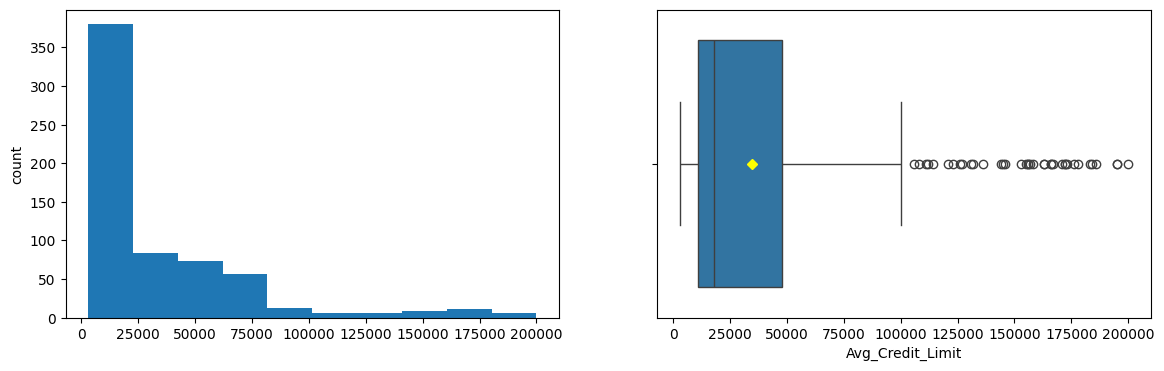

In [44]:
print('Avg_Credit_Limit')

print('Skew :',round(df['Avg_Credit_Limit'].skew(),2))

plt.figure(figsize = (14, 4))

plt.subplot(1, 2, 1)

df['Avg_Credit_Limit'].hist(bins = 10, grid = False)

plt.ylabel('count')

plt.subplot(1, 2, 2)

sns.boxplot(x=df['Avg_Credit_Limit'],showmeans=True,meanprops={"marker": "D",
                       "markerfacecolor": "yellow",
                       "markeredgecolor": "yellow",
                       "markersize": "5"})

plt.show()

- Correlations between the variables suggest that customers with higher credit limits made more online visits, customers with fewer credit cards made more calls, and customers who visited the bank were less likely to make use of the other channels.

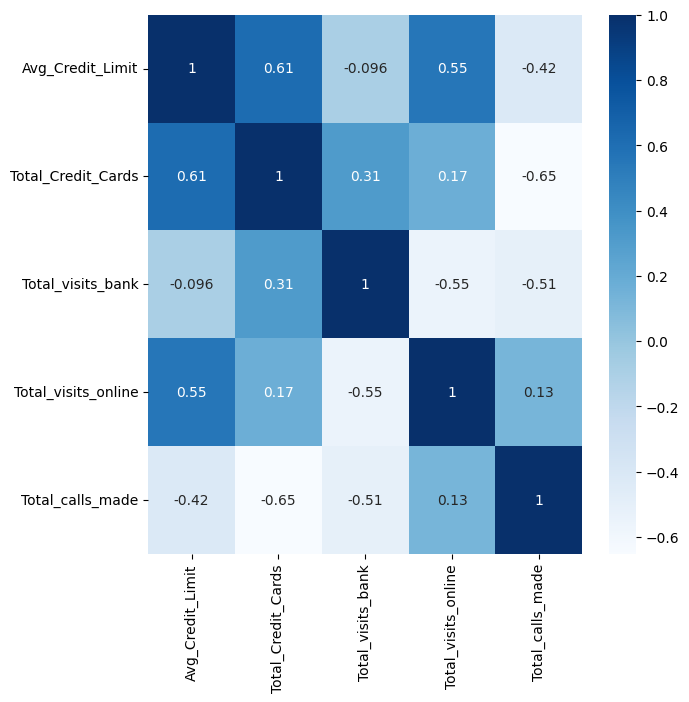

In [45]:
plt.figure(figsize = (7, 7))

sns.heatmap(df.corr(),annot = True,cmap='Blues')

plt.show()

- Application of the K-Means and GMM clustering algorithms identified 3 groups of customers with characteristics summarized below. Both algorithms produced identical results.
>- **Group A:**
 >>* Customers with low credit limits and 1-4 credit cards
 >>* Highest preference for the call center
>- **Group B:**
 >>* Customers with mid-range credit limits and 2-7 credit cards
 >>* Highest preference for bank visits
>- **Group C:**
 >>* Customers with high credit limits and 5-10 credit cards
 >>* Highest preference for online visits.


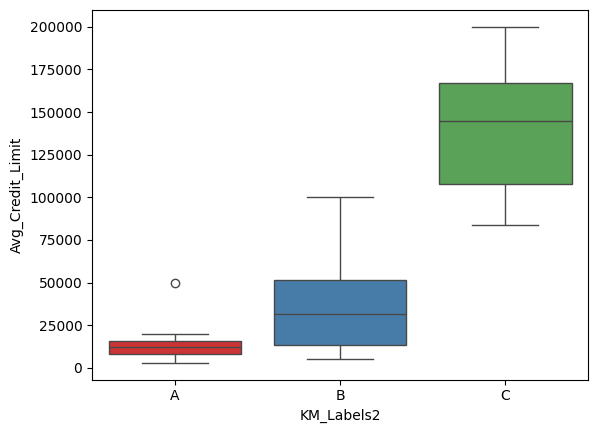

In [46]:
sns.boxplot(x='KM_Labels2',y=df1.Avg_Credit_Limit,data=df1,hue='KM_Labels2',order=['A','B','C'],
                palette='Set1',hue_order=['A','B','C'])
plt.show()

- Due to the skewed nature of the credit limit distribution, K-Means and GMM produced more useful results than the K-Medoids algorithm.

**Business Recommendations:**

- AllLife can utilize the identified customer segments to create personalized marketing campaigns and custom products aimed at the various groups:
>- Group A is comprised of customers with low credit limits and relatively few credit cards. These are likely lower-income customers who would benefit from a card designed to help them build up their credit score, or a card that offers rewards or discounts on everyday expenses. These products could be marketed in a way designed to prioritize the preferences of Group A, such as a calling campaign or a pre-recorded message that plays while the customer is on hold with the call center.
>- Customers in Group B appear to have a strong preference for in-person bank visits over the other two channels. These customers might be interested in a card that provides exclusive branch-related benefits - for example, rewarding them with points, cashback, or special perks for each branch visit or in-person bank transaction. This type of product could be marketed through physical advertisements displayed in and around the various bank branches.
>- Group C consists of customers with high credit limits, a higher number of credit cards, and a preference for online visits. These customers might be interested in a product that incentivizes engagement with online banking services, such as a card that rewards them with points, cashback, or discounts on online transactions and bill payments. These customers could be targeted via digital marketing campaigns, in light of their preference for online activity. While the volume of customers in Group C is relatively small compared to the others, they appear to be high-income customers with a propensity for maintaining multiple credit cards, so would likely be worth the cost of rolling out a personalized campaign.

- AllLife could also use data analytics and predictive modeling techniques to identify potential new customers whose characteristics and behaviors match the profiles of the target segments. These prospects could then be targeted with segment-specific promotional offers (ex. a sign-up bonus for Group B prospects who open a card at a physical branch) through marketing channels that align with their preferences (ex. digital campaigns for Group C prospects).
- The three customer segmentation profiles we have identified could be further refined by incorporating additional data. For example, we could collect information on customer demographics, geographic location, credit scores, and transaction history to get a better sense of the characteristics, typical behaviors, and preferences of each customer group. Collecting this data would further improve targeting accuracy, and help deliver more personalized experiences to meet the unique needs and preferences of AllLife customers.


